# Features Engineering

## Tasks

### Task 1

Import data you need to build models. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [3]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [4]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  float64
 2   store_and_fwd_flag  1458644 non-null  int64  
 3   distance_km         1458644 non-null  float64
 4   log_trip_duration   1458644 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 66.8+ MB


In [5]:
initial_data = pd.read_csv('taxi_dataset.csv')

In [6]:
initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [7]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 111.3+ MB


In [8]:
initial_data.shape[0] == processed_data.shape[0]

True

### Task 2

Do some features engineering work on your data.

In [9]:
initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [10]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


In [11]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [12]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


### Task 3

Conduct exploratory data analysis using charts to determine if the total number of trips and average trip duration depend on the time interval of the trip.

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_barchart(df, x_col, y_col, aggfunc):
    plt.figure(figsize=(16, 10))

    data = processed_data.groupby(x_col, as_index=False).agg({y_col: aggfunc})

    plt.bar(data[x_col], data[y_col])
    plt.title(f'{x_col.upper()} vs {y_col.upper()}', fontdict={'fontsize': 16});

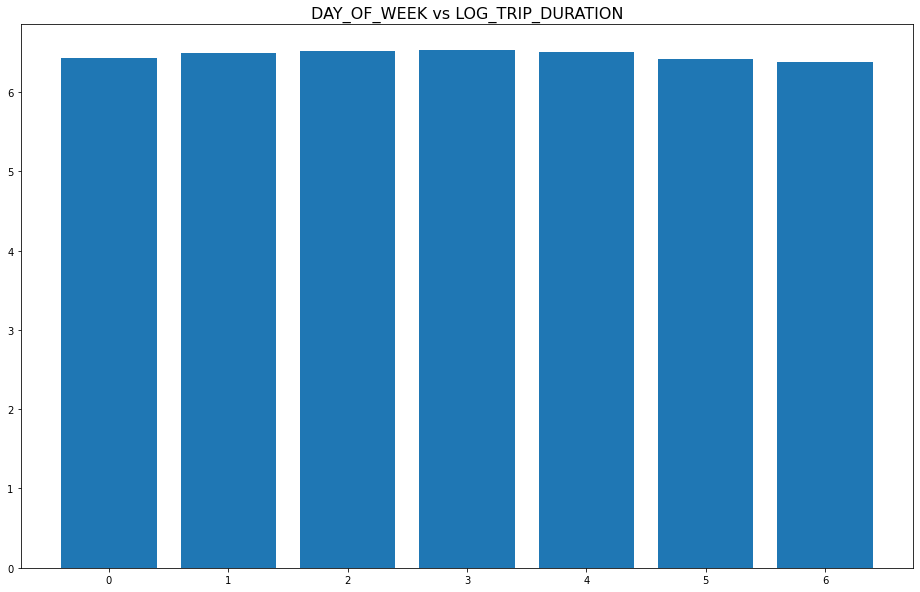

In [15]:
plot_barchart(processed_data, 'day_of_week', 'log_trip_duration', 'mean')

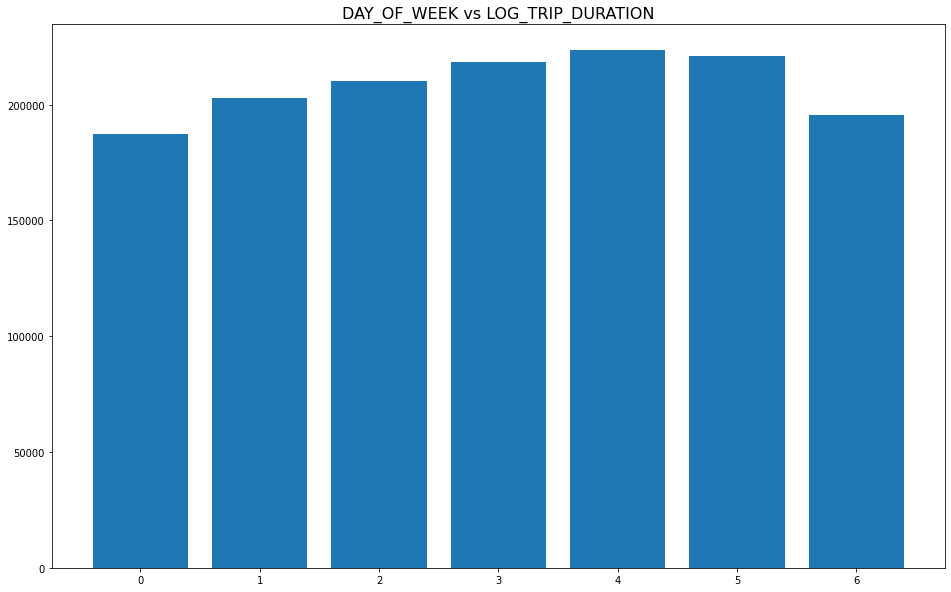

In [16]:
plot_barchart(processed_data, 'day_of_week', 'log_trip_duration', 'count')

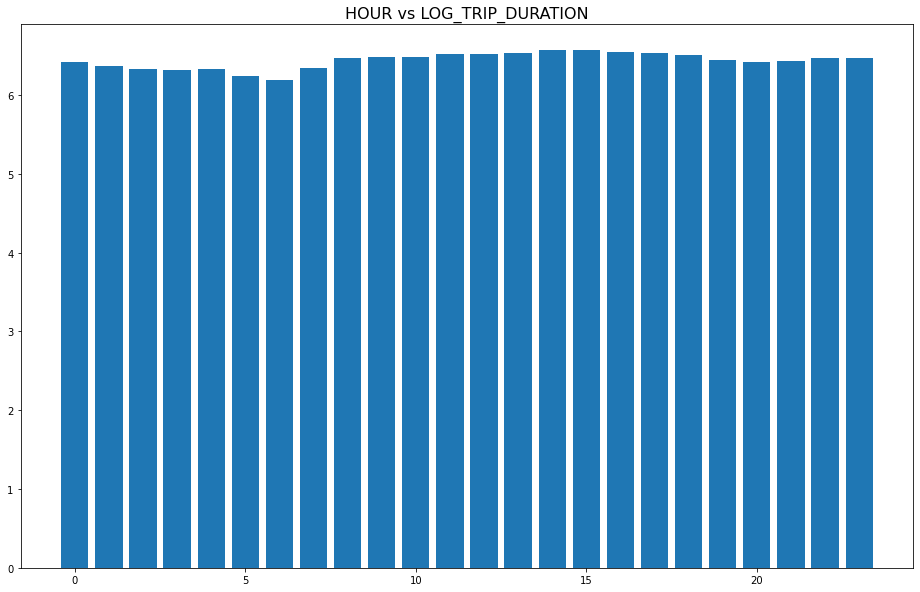

In [17]:
plot_barchart(processed_data, 'hour', 'log_trip_duration', 'mean')

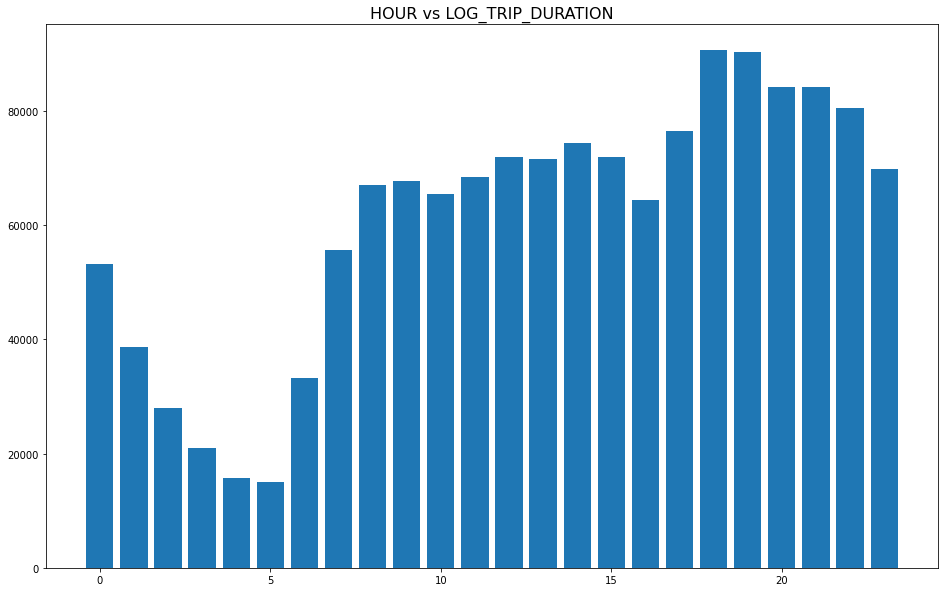

In [18]:
plot_barchart(processed_data, 'hour', 'log_trip_duration', 'count')

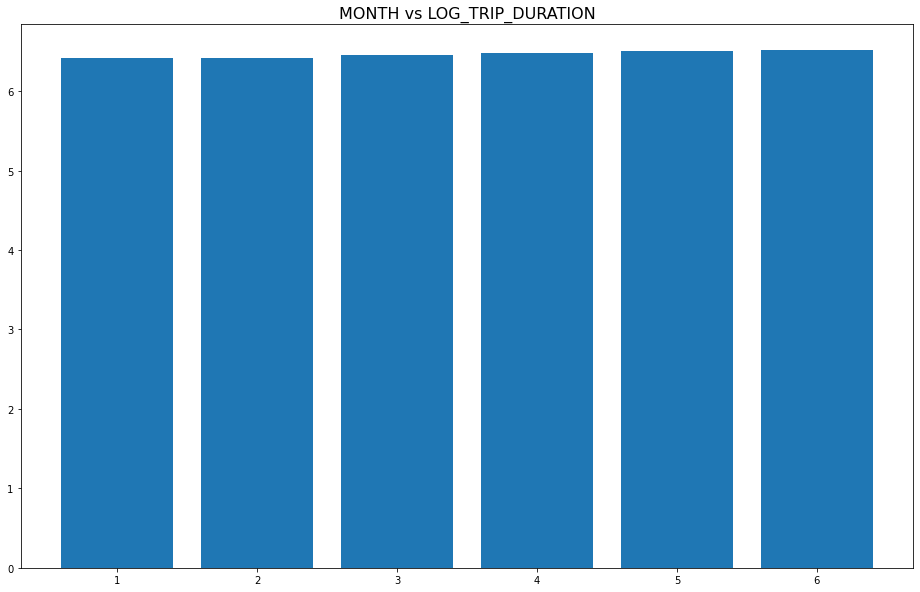

In [19]:
plot_barchart(processed_data, 'month', 'log_trip_duration', 'mean')

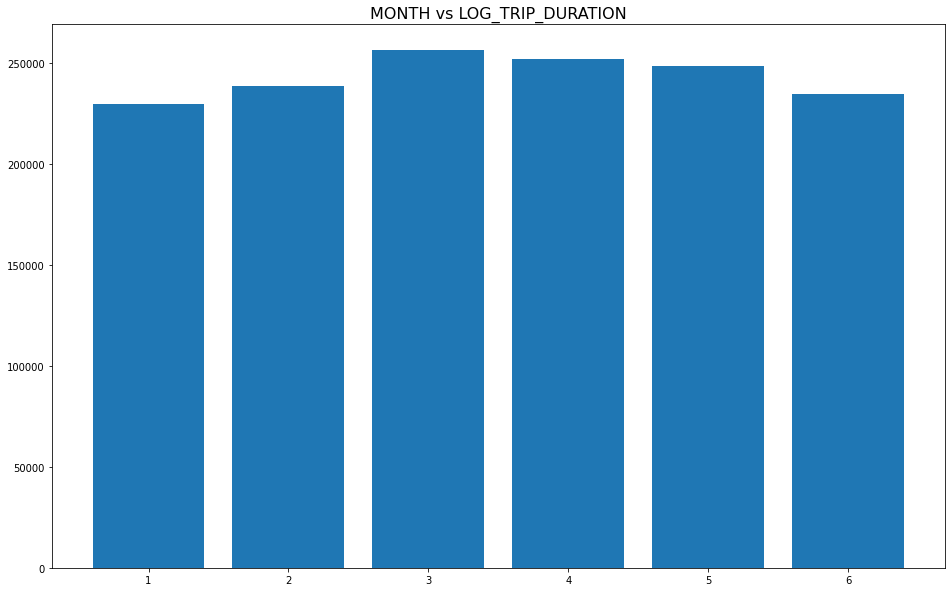

In [20]:
plot_barchart(processed_data, 'month', 'log_trip_duration', 'count')

### Task 4

Create a feature indicating whether a trip occurred during a blizzard.

A blizzard was recorded on January 23rd.

In [21]:
processed_data['anomaly'] = [1 if (date.day == 23 and date.month == 1) else 0 for date in processed_data['date']]

In [22]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0


### Task 5

Create a feature indicating whether a ride occurred during a traffic jam.

Define traffic jams as the top ten time intervals with the longest average trip durations.

In [23]:
traffic_intervals_df = processed_data.groupby(['day_of_week', 'hour'], as_index=False).agg({'log_trip_duration': 'mean'}) \
    .sort_values('log_trip_duration', ascending=False).head(10)

In [24]:
traffic_intervals_df

,day_of_week,hour,log_trip_duration
86,3,14,6.669526
87,3,15,6.650622
63,2,15,6.647091
59,2,11,6.644226
61,2,13,6.640205
62,2,14,6.638930
35,1,11,6.635141
83,3,11,6.635055
111,4,15,6.632537
88,3,16,6.630965


In [25]:
traffic_days = traffic_intervals_df.day_of_week.to_list()

In [26]:
traffic_hours = traffic_intervals_df.hour.to_list()

In [27]:
traffic_intervals = [(x, y) for x, y in zip(traffic_days, traffic_hours)]

In [28]:
traffic_intervals

[(3, 14),
 (3, 15),
 (2, 15),
 (2, 11),
 (2, 13),
 (2, 14),
 (1, 11),
 (3, 11),
 (4, 15),
 (3, 16)]

In [29]:
processed_data['traffic_jam'] = [1 if (x, y) in traffic_intervals else 0 for x, y in zip(processed_data.day_of_week.values, processed_data.hour.values)]

In [30]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


### Task 6

Drop `pickup_datetime` and `date` columns because we won't need them anymore.

In [31]:
processed_data.drop(['pickup_datetime', 'date'], axis=1, inplace=True)

In [32]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,5,13,3,0,0


### Task 7

Use OneHotEncoding techinque for `day_of_week`, `hour` and `month` columns.

In [33]:
day_of_week_ohe = pd.get_dummies(processed_data.day_of_week, prefix='day_of_week', drop_first=True)

In [34]:
day_of_week_ohe.head()

,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
id,,,,,,
id2875421,0,0,0,0,0,0
id2377394,0,0,0,0,0,1
id3858529,1,0,0,0,0,0
id3504673,0,1,0,0,0,0
id2181028,0,0,0,0,1,0


In [35]:
hour_ohe = pd.get_dummies(processed_data.hour, prefix='hour', drop_first=True)

In [36]:
hour_ohe.head()

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
id,,,,,,,,,,,,,,,,,,,,,
id2875421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
id2377394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id3858529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
id2181028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
month_ohe = pd.get_dummies(processed_data.month, prefix='month', drop_first=True)

In [38]:
month_ohe.head()

,month_2,month_3,month_4,month_5,month_6
id,,,,,
id2875421,0,1,0,0,0
id2377394,0,0,0,0,1
id3858529,0,0,0,0,0
id3504673,0,0,1,0,0
id2181028,0,1,0,0,0


In [39]:
processed_data = processed_data.join(day_of_week_ohe, how='inner')

In [40]:
processed_data = processed_data.join(hour_ohe, how='inner')

In [41]:
processed_data = processed_data.join(month_ohe, how='inner')

In [42]:
processed_data.drop(['day_of_week', 'hour', 'month'], axis=1, inplace=True)

In [43]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
processed_data.head().to_csv('output.csv', sep=',')

### Task 8. 

Find correlation coefficient between `distance_km` and `passenger_count` features.

In [45]:
processed_data[['distance_km', 'passenger_count']].corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


### Task 9. 

Use `SequentialFeatureSelector` to find the top-5 most important features for a linear regression model.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [47]:
X = processed_data.drop(['log_trip_duration'], axis=1)
y = processed_data[['log_trip_duration']]

In [48]:
model = LinearRegression()

top_5_features = SequentialFeatureSelector(model, n_features_to_select=5)
top_5_features.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [49]:
top_5_features.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

### Task 10. 

Use those 5 features to build a linear regression model and assess the results using MSE.

In [50]:
X_top = processed_data[['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']]

In [51]:
model = LinearRegression()
model.fit(X_top, y)

LinearRegression()

In [52]:
preds = model.predict(X_top)

In [53]:
np.mean((preds - y.values)**2)

0.41540002340782545